    # Automatic Jupyter Notebook for OpenML dataset 4: labor

In [1]:
%matplotlib inline
from scripts.preamble import *
did = 4
data = oml.datasets.get_dataset(did)
X, y, features = getData(data)
task, topList, strats, scores = getOpenMLData(did, data.default_target_attribute) 
topList[:10] 

,flow,score
0,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.995946
1,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.995946
2,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.995946
3,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.994595
4,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.993243
5,weka.Bagging_LMT(2),0.993243
6,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.991892
7,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.991892
8,weka.Bagging_LMT(2),0.991892
9,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.991892


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


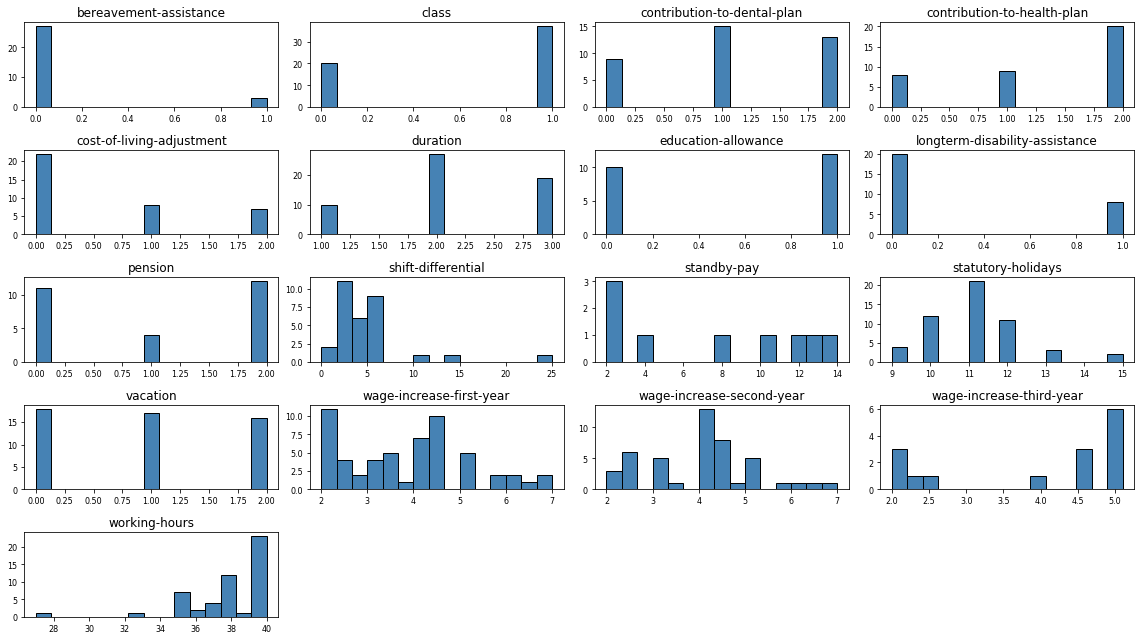

In [3]:
from scripts.dataVisualization import *
show1DHist(data) 

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan,outlier
36,1,2,nan,nan,2,40,1,4,0,1,11,2,1,0,1,0,-0.0836722
8,2,3,7,nan,nan,38,nan,12,25,0,11,0,0,1,0,nan,-0.0594627
34,3,2,2.5,2.1,2,40,0,2,1,1,10,0,1,1,0,2,-0.0535291
40,1,4,nan,nan,0,nan,0,nan,nan,0,11,1,1,0,1,0,-0.0310271
17,1,2.1,nan,nan,2,40,1,2,3,1,9,0,0,1,nan,0,-0.0298546
18,1,2,nan,nan,0,38,0,nan,nan,0,11,1,1,0,1,0,-0.0283461
56,3,6,6,4,nan,35,nan,nan,14,nan,9,2,0,2,0,2,-0.0224442
31,3,3,2,2.5,2,40,0,nan,5,1,10,0,0,1,0,2,-0.0194369
37,1,2.8,nan,nan,0,38,2,2,3,1,9,0,0,1,nan,0,-0.0166816
6,3,4,5,5,2,nan,2,nan,nan,nan,12,2,0,0,0,1,-0.00890631


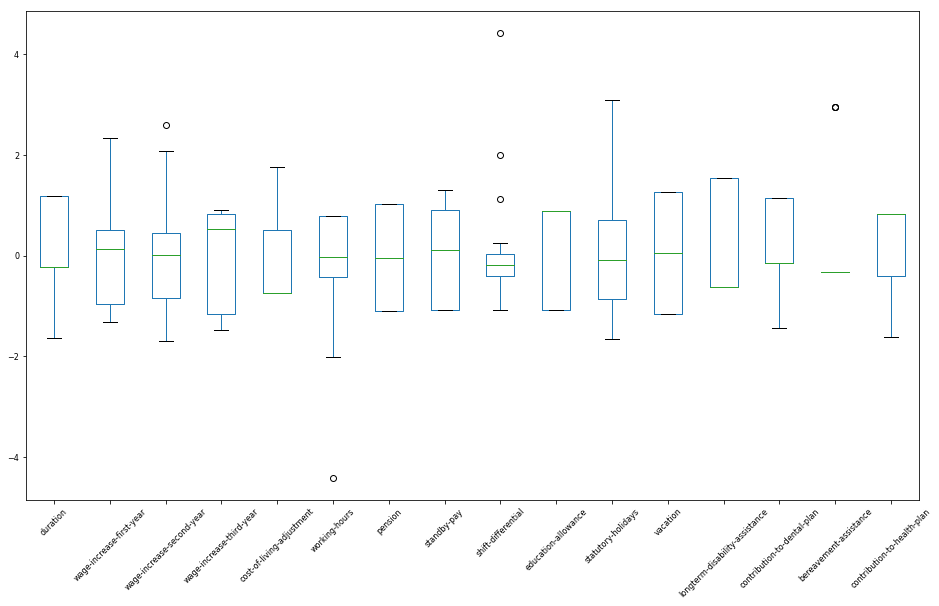

In [4]:
from scripts.outlierDetection import *
outlierDetection(X, features, 10) 

In [5]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

     did                    name  similarity                             url
0     51                 heart-h       0.882     https://www.openml.org/d/51
1   1008    analcatdata_reviewer       0.876   https://www.openml.org/d/1008
2    524                     pbc       0.871    https://www.openml.org/d/524
3  40945                 Titanic       0.867  https://www.openml.org/d/40945
4    532  analcatdata_uktrainacc       0.861    https://www.openml.org/d/532
5    858               hungarian       0.861    https://www.openml.org/d/858
6    963                 heart-h       0.861    https://www.openml.org/d/963
7    760  analcatdata_uktrainacc       0.860    https://www.openml.org/d/760
8    989                  anneal       0.860    https://www.openml.org/d/989
9    200                     pbc       0.858    https://www.openml.org/d/200


Complexity threshold to determine if an algorithm will be run.


In [6]:
comp = 50000000000000

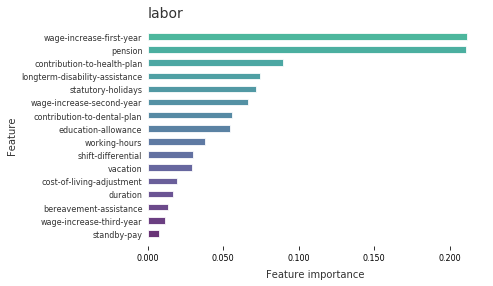

In [7]:
from scripts.featureImportance import *
featureImportance(data) 

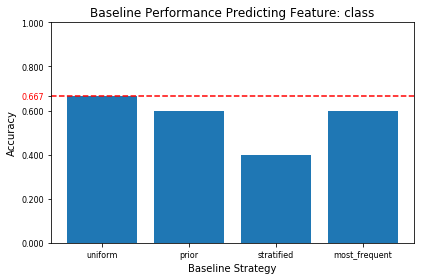

In [8]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Please run the full notebook then toggle removeOutliers and run this cell and the next to compare the algorithms with and without outliers. 

In [9]:
removeOutliers = False 

c:\users\hugo\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Run already exists in OpenML, WIP
Run already exists in OpenML, WIP


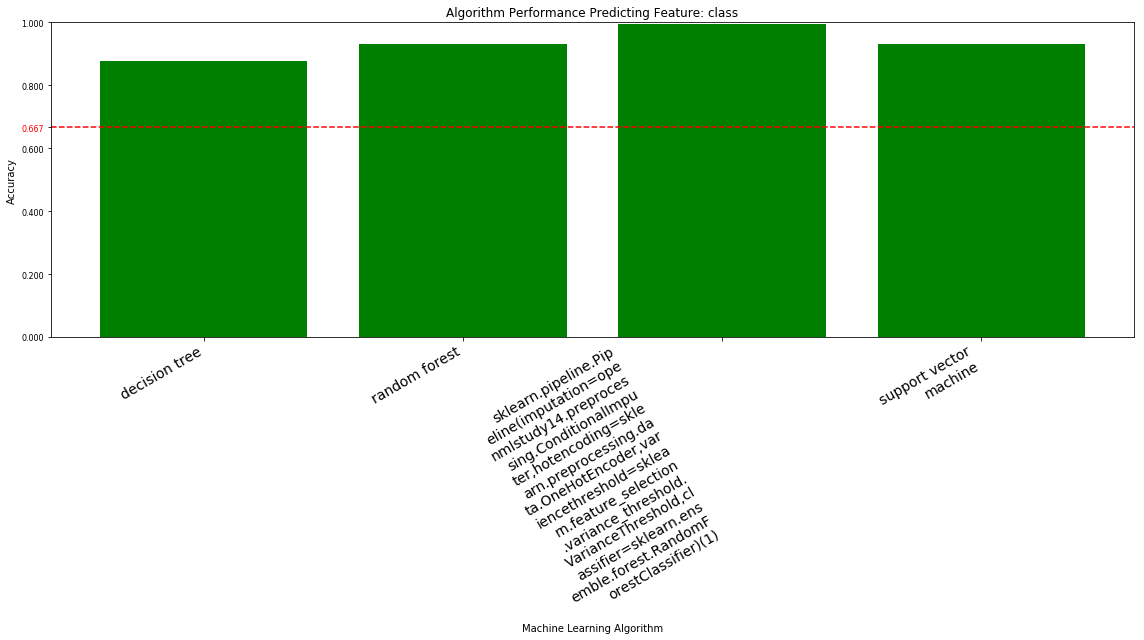

In [10]:
from scripts.machineLearningAlgorithms import *
settings = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=False, runTPOT=False, removeOutliers=removeOutliers)
plot_alg(data, settings.strats, maxBaseline, problemType) 

Run already exists in OpenML, WIP


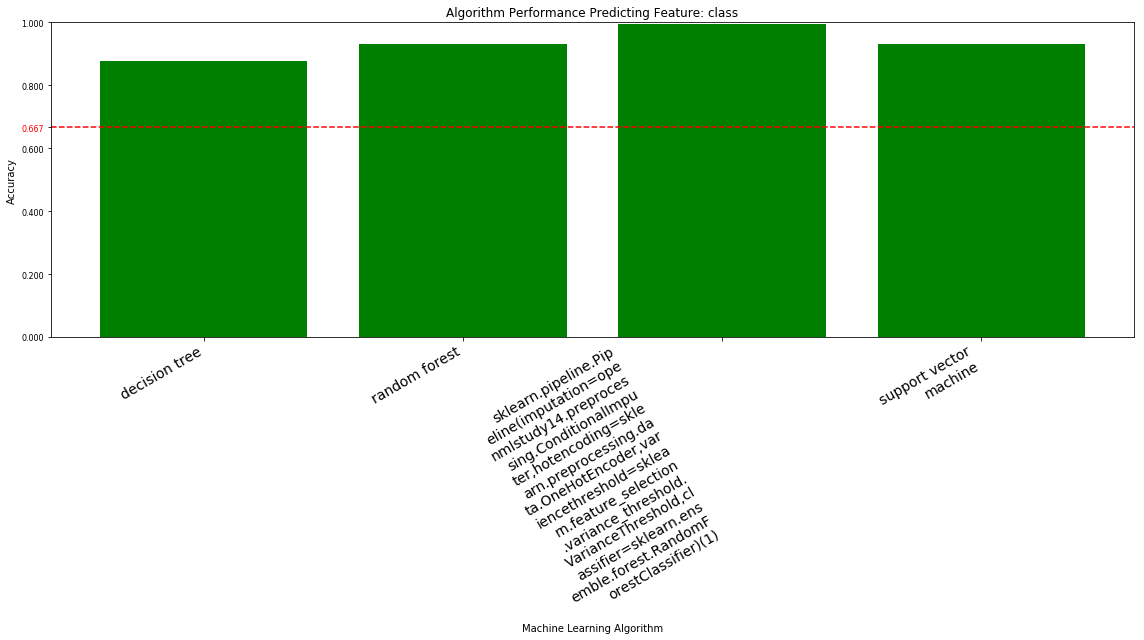

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Create a custom algorithm by setting classifier and name
#---------------------------------------------------
clf =  QuadraticDiscriminantAnalysis()
name = "CustomAlgorithmQuadraticDiscriminantAnalysis"
#---------------------------------------------------
runMLAlgorithm(estimator=clf, name=name, settings=settings)
plot_alg(data, settings.strats, maxBaseline, problemType) 

In [12]:
%matplotlib nbagg
from scripts.relativePerformance import * 
showRelativePerformanceBoxplot(scores, topList, settings.strats, maxBaseline) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>